In [1]:
%display latex

In [2]:
R = 8.314 * units.energy.joule / (units.amount_of_substance.mole * units.temperature.kelvin)



Two moles of helium at an initial pressure of 1.00 atm and temperature 311 K is compressed adiabatically to a pressure of 4.30 atm. The gas is then allowed to cool at constant volume to a temperature of 400 K.

            (a) Draw a pV diagram of the two processes described.

            (b) Create a table of p, V, T and pV for each of the three states described.

            (c) Create a table of DE, W, and Q for each of the two processes.

In the box below, enter the total of the W column, in atm-L, for the two processes.


We know that for adiabatic compression, there is no heat taken or added to the volume from the enviroment.
All new energy needs to be obtained from the work. We can't directly calculate work, but we can calculate the total internal energy.

$$\Delta U = Q + W$$
$$U_f - U_i = W$$

$$U = n C_v T$$
$$nC_v(T_f - T_i) = W$$ We do know the initial temperate, but we do not know the final, we do however know the final pressure

$$PV = nRT$$ 
$$T = \frac{PV}{nR}$$


$$nC_v(\frac{P_fV_f}{nR} - \frac{P_iV_i}{nR}) = W$$
$$\frac{C_v}{R}(P_fV_f - P_iV_i) = W$$

We can then pull out C_v / R as a constant.

$$ \gamma = \frac{C_p}{C_v} $$
$$ C_p = C_v + R $$
$$ \gamma = \frac{C_v + R}{C_v} $$
$$ \gamma = 1 + \frac{R}{C_v} $$ We multiply both top and bottom by $ \frac{1}{C_v} $
$$ \gamma - 1 = \frac{R}{C_v} $$ 
$$ \gamma - 1 = \frac{R}{C_v} $$
$$ \frac{R}{\gamma - 1} = C_v $$

$$\frac{\frac{R}{\gamma - 1}}{R}(P_fV_f - P_iV_i) = W$$
$$\frac{1}{\gamma - 1}(P_fV_f - P_iV_i) = W$$
$$\frac{1}{\gamma - 1}(P_fV_f - P_iV_i) = W$$

In [81]:
i_n = 2 * units.amount_of_substance.mole
i_T0 = 320 * units.temperature.kelvin
i_P0 = (units.pressure.atmosphere).convert(units.pressure.pascal)
i_P1 = (4.5 * units.pressure.atmosphere).convert(units.pressure.pascal)
i_T2 = 400 * units.temperature.kelvin

In [82]:
for i in range(2):
    var(f'P{i} T{i} V{i}')

In [83]:
gamma = 5/3
gamma

5/3

In [84]:
var('P V T')
pv_table = [[P, V, T, P * V]]

def add_state(P, V, T):
    pv_table.append([P, V, T, P * V])

def add_adibatic_process_known_pressure(new_P):
    last_V = pv_table[-1][1]
    last_P = pv_table[-1][0]

    new_V = last_V * (last_P / new_P) ** (1 / gamma)

    pv_table.append([new_P, new_V, new_P * new_V / (i_n * R), new_P * new_V])

def add_isovolumentic_process_known_T(new_T):
    last_V = pv_table[-1][1]
    
    new_P = (i_n * R * new_T) / last_V
    
    pv_table.append([new_P, last_V, new_T, new_P * last_V])

table(pv_table)

\(P\),\(V\),\(T\),\(P V\)


In [85]:
add_state(i_P0, i_n * R * i_T0 / i_P0, i_T0)
table(pv_table)

\(P\),\(V\),\(T\),\(P V\)
"\(101325 \, \mathit{pascal}\)","\(\frac{0.0525137922526524 \, \mathit{joule}}{\mathit{pascal}}\)","\(320 \, \mathit{kelvin}\)","\(5320.96000000000 \, \mathit{joule}\)"


In [86]:
add_adibatic_process_known_pressure(i_P1)

In [87]:
table(pv_table)

\(P\),\(V\),\(T\),\(P V\)
"\(101325 \, \mathit{pascal}\)","\(\frac{0.0525137922526524 \, \mathit{joule}}{\mathit{pascal}}\)","\(320 \, \mathit{kelvin}\)","\(5320.96000000000 \, \mathit{joule}\)"
"\(455962.500000000 \, \mathit{pascal}\)","\(\frac{0.0212983457760676 \, \mathit{joule}}{\mathit{pascal}}\)","\(584.029768217477 \, \mathit{kelvin}\)","\(9711.24698592022 \, \mathit{joule}\)"


In [88]:
add_isovolumentic_process_known_T(i_T2)
table(pv_table)

\(P\),\(V\),\(T\),\(P V\)
"\(101325 \, \mathit{pascal}\)","\(\frac{0.0525137922526524 \, \mathit{joule}}{\mathit{pascal}}\)","\(320 \, \mathit{kelvin}\)","\(5320.96000000000 \, \mathit{joule}\)"
"\(455962.500000000 \, \mathit{pascal}\)","\(\frac{0.0212983457760676 \, \mathit{joule}}{\mathit{pascal}}\)","\(584.029768217477 \, \mathit{kelvin}\)","\(9711.24698592022 \, \mathit{joule}\)"
"\(312287.163985937 \, \mathit{pascal}\)","\(\frac{0.0212983457760676 \, \mathit{joule}}{\mathit{pascal}}\)","\(400 \, \mathit{kelvin}\)","\(6651.20000000000 \, \mathit{joule}\)"


In [89]:
dE, Q, W = var('Delta_E Q W')
dE_table = [[dE, Q, W]]

table(dE_table)

\(\Delta_{E}\),\(Q\),\(W\)


In [90]:
# Calculate the internal energy at each state
U = [
    i_n * (3 / 2 * R) * r[2] for r in pv_table[1:]
]
U

[7981.44000000000*joule, 14566.8704788803*joule, 9976.80000000000*joule]

In [91]:
# Calculate dE For each
dEs = [
    U[i] - U[i - 1] for i in range(1, len(U))
]
dEs

[6585.43047888032*joule, -4590.07047888032*joule]

In [92]:
dE_table.append([dEs[0], 0 * units.energy.joule, dEs[0]])
dE_table.append([dEs[1], dEs[1], 0 * units.energy.joule])
table(dE_table)

\(\Delta_{E}\),\(Q\),\(W\)
"\(6585.43047888032 \, \mathit{joule}\)",\(0\),"\(6585.43047888032 \, \mathit{joule}\)"
"\(-4590.07047888032 \, \mathit{joule}\)","\(-4590.07047888032 \, \mathit{joule}\)",\(0\)


In [93]:
sum([r[2].convert(units.pressure.atmosphere * units.volume.liter) for r in dE_table[1:]])

64.9931456094776*atmosphere*liter

A diatomic ideal gas with initial pressure and volume 3.40 atm and 13.0 L, respectively, is allowed to expand at constant pressure to a volume of 20.0 L. It is then allowed to expand adiabatically to a volume of 34.0 L.

            (a) Draw a pV diagram of the two processes described.

            (b) Create a table of p, V, T and pV for each of the three states described.

            (c) Create a table of DE, W, and Q for each of the two processes.

In the box below, enter the total of the W column, in atm-L, for the two processes.


In [208]:
forget()

In [217]:
var('n')
Cv = 5 / 2 * R
P = (3.3 * units.pressure.atmosphere).convert()
V = (12.0 * units.volume.liter).convert()
T = P * V / (n * R)
U = n * Cv * T
dE = U

states = [['P', 'V', 'T', 'U', 'dE', 'Q', 'W']]

states.append([P, V, T, U, dE, 0, 0])

table(states)

P,V,T,U,dE,Q,W
"\(\frac{334372.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(0.0120000000000000 \, \mathit{meter}^{3}\)","\(\frac{482.616069280731 \, \mathit{kelvin} \mathit{kilogram} \mathit{meter}^{2} \mathit{mole}}{\mathit{joule} n \mathit{second}^{2}}\)","\(\frac{10031.1750000000 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)","\(\frac{10031.1750000000 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)",\(0\),\(0\)


In [218]:
# Expansion at constant pressure:

new_P = P
new_V = (20.0 * units.volume.liter).convert()
new_T = new_P * new_V / (n * R)
new_U = n * Cv * new_T
new_dE = new_U - U

# Temperature is only dependent on the internal energy and moles. It isn't specified if the gas is doing work on something like a piston,
# Since the pressure stays the same, and the volume increases, the temperature must increase, since they are directly proportional.
# Since we assume the gas can't just generate energy out of nowhere, the energy must come from the enviroment.
W = P * (new_V - V)
Q = new_dE + W
states.append([new_P, new_V, new_T, new_U, new_dE, Q, W])

In [219]:
P = new_P
V = new_V
T = new_T
U = new_U
dE = new_dE

In [220]:
# Calculate correspoding new pressure for adiabatic expansion

gamma = (Cv + R) / (Cv)
new_V = (32.0 * units.volume.liter).convert()
new_P = var("Pn")
new_P = solve(new_P * new_V ** gamma == P * V ** gamma, [new_P])[0].rhs()

new_P, new_V, gamma

(30600704867685/176713144*kilogram/(meter*second^2),
 0.0320000000000000*meter^3,
 1.40000000000000)

In [221]:
# Recalc U, dE and T

new_T = new_P * new_V / (n * R)
new_U = n * Cv * new_T
new_dE = new_U - U

new_T, new_U, new_dE

(666.503654025146*kelvin*kilogram*meter^2*mole/(joule*n*second^2),
 13853.2784489127*kilogram*meter^2/second^2,
 -2865.34655108734*kilogram*meter^2/second^2)

In [222]:

states.append([new_P, new_V, new_T, new_U, new_dE, 0, -new_dE])

P = new_P
V = new_V
T = new_T
U = new_U
dE = new_dE

table(states)

P,V,T,U,dE,Q,W
"\(\frac{334372.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(0.0120000000000000 \, \mathit{meter}^{3}\)","\(\frac{482.616069280731 \, \mathit{kelvin} \mathit{kilogram} \mathit{meter}^{2} \mathit{mole}}{\mathit{joule} n \mathit{second}^{2}}\)","\(\frac{10031.1750000000 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)","\(\frac{10031.1750000000 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)",\(0\),\(0\)
"\(\frac{334372.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(0.0200000000000000 \, \mathit{meter}^{3}\)","\(\frac{804.360115467886 \, \mathit{kelvin} \mathit{kilogram} \mathit{meter}^{2} \mathit{mole}}{\mathit{joule} n \mathit{second}^{2}}\)","\(\frac{16718.6250000000 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)","\(\frac{6687.45000000000 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)","\(\frac{9362.43000000000 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)","\(\frac{2674.98000000000 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)"
"\(\frac{30600704867685 \, \mathit{kilogram}}{176713144 \, \mathit{meter} \mathit{second}^{2}}\)","\(0.0320000000000000 \, \mathit{meter}^{3}\)","\(\frac{666.503654025146 \, \mathit{kelvin} \mathit{kilogram} \mathit{meter}^{2} \mathit{mole}}{\mathit{joule} n \mathit{second}^{2}}\)","\(\frac{13853.2784489127 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)","\(-\frac{2865.34655108734 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)",\(0\),"\(\frac{2865.34655108734 \, \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)"


In [223]:
sum([r[6] for r in states[1:]]).convert(units.pressure.atmosphere * units.volume.liter)

54.6787717847258*(atmosphere*liter)

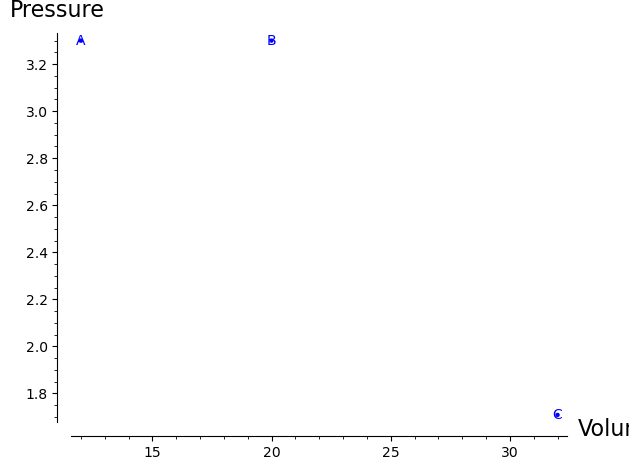

In [224]:
plt = point((states[1][1].convert(units.volume.liter) / units.volume.liter, states[1][0].convert(units.pressure.atmosphere) / units.pressure.atmosphere) ) + \
point((states[2][1].convert(units.volume.liter) / units.volume.liter, states[2][0].convert(units.pressure.atmosphere) / units.pressure.atmosphere) ) + \
point((states[3][1].convert(units.volume.liter) / units.volume.liter, states[3][0].convert(units.pressure.atmosphere) / units.pressure.atmosphere) ) + \
text('A', (states[1][1].convert(units.volume.liter) / units.volume.liter, states[1][0].convert(units.pressure.atmosphere) / units.pressure.atmosphere)) + \
text('B', (states[2][1].convert(units.volume.liter) / units.volume.liter, states[2][0].convert(units.pressure.atmosphere) / units.pressure.atmosphere)) + \
text('C', (states[3][1].convert(units.volume.liter) / units.volume.liter, states[3][0].convert(units.pressure.atmosphere) / units.pressure.atmosphere))

plt.axes_labels(['Volume', 'Pressure'])
plt



One mole of air at an initial temperature and pressure of 318 K and 1.10 atm, respectively, is heated at constant volume to a temperature of 677 K. It is then compressed at constant pressure. Finally, it is allowed to expand at constant temperature to return to its original state. (Note: since air is almost entirely nitrogen and oxygen, you can assume it is a diatomic ideal gas.)

            (a) Draw a pV diagram of the three processes described.

            (b) Create a table of p, V, T and pV for each of the three states described.

            (c) Create a table of DE, W, and Q for each of the three processes.

In the box below, enter the total of the Q column, in atm-L, for the three processes.


In [485]:
forget()

In [486]:
T0 = 318 * units.temperature.kelvin
P0 = (1.1 * units.pressure.atmosphere).convert()

T1 = 677 * units.temperature.kelvin # Heated constant volume

n = (units.amount_of_substance.mole)

In [487]:
states = [['P', 'V', 'T', 'U', 'Q', 'W']]

Cv = (5/2 * R)
P = P0
T = T0
V = (n * R * T) / (P)
U = n * Cv * T

states.append([P, V, T, U, 0 * units.energy.joule, 0 * units.energy.joule])

table(states)

P,V,T,U,Q,W
"\(\frac{111457.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(318 \, \mathit{kelvin}\)","\(6609.63000000000 \, \mathit{joule}\)",\(0\),\(0\)


In [488]:
# Heated to T1

new_V = V
new_T = T1
new_P = (n * R * new_T) / (new_V)

new_U = n * Cv * new_T

Q = new_U - U

states.append([new_P, new_V, new_T, new_U, Q, 0 * units.energy.joule])
table(states)

P,V,T,U,Q,W
"\(\frac{111457.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(318 \, \mathit{kelvin}\)","\(6609.63000000000 \, \mathit{joule}\)",\(0\),\(0\)
"\(\frac{237285.306603774 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(677 \, \mathit{kelvin}\)","\(14071.4450000000 \, \mathit{joule}\)","\(7461.81500000000 \, \mathit{joule}\)",\(0\)


In [489]:
P = new_P
V = new_V
T = new_T
U = new_U

In [490]:
# Compressed at constant_temp to V_p
Vp = var('Vp')
new_V = Vp * units.volume.liter.convert()
new_P = P
new_T = (new_P * new_V) / (n * R)

new_U = n * Cv * new_T
W = P * (new_V - V)
Q = (new_U - U) + W

states.append([new_P, new_V, new_T, new_U, Q, W])
table(states)

P,V,T,U,Q,W
"\(\frac{111457.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(318 \, \mathit{kelvin}\)","\(6609.63000000000 \, \mathit{joule}\)",\(0\),\(0\)
"\(\frac{237285.306603774 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(677 \, \mathit{kelvin}\)","\(14071.4450000000 \, \mathit{joule}\)","\(7461.81500000000 \, \mathit{joule}\)",\(0\)
"\(\frac{237285.306603774 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{1}{1000} \, \mathit{Vp} \mathit{meter}^{3}\)","\(\frac{28.5404506379328 \, \mathit{Vp} \mathit{kelvin} \mathit{kilogram} \mathit{meter}^{2}}{\mathit{joule} \mathit{second}^{2}}\)","\(\frac{593.213266509434 \, \mathit{Vp} \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)","\(\frac{593.213266509434 \, \mathit{Vp} \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}} - 14071.4450000000 \, \mathit{joule} + \frac{237.285306603774 \, {\left(\mathit{Vp} \mathit{meter}^{3} - \frac{23.7207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\right)} \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{237.285306603774 \, {\left(\mathit{Vp} \mathit{meter}^{3} - \frac{23.7207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\right)} \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)"


In [491]:
P = new_P
V = new_V
T = new_T
U = new_U

In [492]:
# Expand back with constant temperature
Vo = states[1][1]

new_V = Vo
new_T = T
new_P = (n * R * new_T) / new_V

new_U = U
W = P * (new_V - V)
Q = W

states.append([new_P, new_V, new_T, new_U, Q, W])
table(states)

P,V,T,U,Q,W
"\(\frac{111457.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(318 \, \mathit{kelvin}\)","\(6609.63000000000 \, \mathit{joule}\)",\(0\),\(0\)
"\(\frac{237285.306603774 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(677 \, \mathit{kelvin}\)","\(14071.4450000000 \, \mathit{joule}\)","\(7461.81500000000 \, \mathit{joule}\)",\(0\)
"\(\frac{237285.306603774 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{1}{1000} \, \mathit{Vp} \mathit{meter}^{3}\)","\(\frac{28.5404506379328 \, \mathit{Vp} \mathit{kelvin} \mathit{kilogram} \mathit{meter}^{2}}{\mathit{joule} \mathit{second}^{2}}\)","\(\frac{593.213266509434 \, \mathit{Vp} \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)","\(\frac{593.213266509434 \, \mathit{Vp} \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}} - 14071.4450000000 \, \mathit{joule} + \frac{237.285306603774 \, {\left(\mathit{Vp} \mathit{meter}^{3} - \frac{23.7207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\right)} \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{237.285306603774 \, {\left(\mathit{Vp} \mathit{meter}^{3} - \frac{23.7207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\right)} \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)"
"\(\frac{10003.2933238283 \, \mathit{Vp} \mathit{kilogram}^{2} \mathit{meter}}{\mathit{joule} \mathit{second}^{4}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(\frac{28.5404506379328 \, \mathit{Vp} \mathit{kelvin} \mathit{kilogram} \mathit{meter}^{2}}{\mathit{joule} \mathit{second}^{2}}\)","\(\frac{593.213266509434 \, \mathit{Vp} \mathit{kilogram} \mathit{meter}^{2}}{\mathit{second}^{2}}\)","\(-\frac{237.285306603774 \, {\left(\mathit{Vp} \mathit{meter}^{3} - \frac{23.7207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\right)} \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(-\frac{237.285306603774 \, {\left(\mathit{Vp} \mathit{meter}^{3} - \frac{23.7207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\right)} \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)"


We have an unknown, there is only one way the volume can return to it's original and it is by solving that uknown

In [493]:
Vp_soln = solve(states[-1][0] == states[1][0], Vp)[0]

In [494]:
for (i_r, r) in enumerate(states[1:]):
    for (i_c, c) in enumerate(r):
        if isinstance(c, Expression):
            if Vp in c.variables():
                show(c.variables())
                show( c.subs(Vp_soln.lhs() == Vp_soln.rhs()) )
                states[i_r + 1][i_c] = c.subs(Vp_soln.lhs() == Vp_soln.rhs())

table(states)

(Vp, meter)

896400659/80451820000*joule*meter*second^2/kilogram

(Vp, joule, kelvin, kilogram, meter, second)

318.000000000000*kelvin

(Vp, kilogram, meter, second)

6609.62999999999*joule

(Vp, joule, kilogram, meter, second)

-10446.5410000000*joule

(Vp, joule, kilogram, meter, second)

-2984.72600000000*joule

(Vp, joule, kilogram, meter, second)

111457.500000000*kilogram/(meter*second^2)

(Vp, joule, kelvin, kilogram, meter, second)

318.000000000000*kelvin

(Vp, kilogram, meter, second)

6609.62999999999*joule

(Vp, joule, kilogram, meter, second)

2984.72600000000*joule

(Vp, joule, kilogram, meter, second)

2984.72600000000*joule

P,V,T,U,Q,W
"\(\frac{111457.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(318 \, \mathit{kelvin}\)","\(6609.63000000000 \, \mathit{joule}\)",\(0\),\(0\)
"\(\frac{237285.306603774 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(677 \, \mathit{kelvin}\)","\(14071.4450000000 \, \mathit{joule}\)","\(7461.81500000000 \, \mathit{joule}\)",\(0\)
"\(\frac{237285.306603774 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{896400659 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{80451820000 \, \mathit{kilogram}}\)","\(318.000000000000 \, \mathit{kelvin}\)","\(6609.62999999999 \, \mathit{joule}\)","\(-10446.5410000000 \, \mathit{joule}\)","\(-2984.72600000000 \, \mathit{joule}\)"
"\(\frac{111457.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0237207186595788 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(318.000000000000 \, \mathit{kelvin}\)","\(6609.62999999999 \, \mathit{joule}\)","\(2984.72600000000 \, \mathit{joule}\)","\(2984.72600000000 \, \mathit{joule}\)"


In [497]:
sum([r[4] for r in states[1:]]).factor().convert(units.pressure.atmosphere * units.volume.liter)

-(7.18081185707715e-14)*(atmosphere*liter)



One mole of air at an initial temperature and pressure of 318 K and 1.10 atm, respectively, is heated at constant volume to a temperature of 677 K. It is then compressed at constant pressure. Finally, it is allowed to expand at constant temperature to return to its original state. (Note: since air is almost entirely nitrogen and oxygen, you can assume it is a diatomic ideal gas.)

            (a) Draw a pV diagram of the three processes described.

            (b) Create a table of p, V, T and pV for each of the three states described.

            (c) Create a table of DE, W, and Q for each of the three processes.

In the box below, enter the total of the Q column, in atm-L, for the three processes.


In [504]:
forget()

T0 = 323 * units.temperature.kelvin
P0 = (1.1 * units.pressure.atmosphere).convert()

T1 = 673 * units.temperature.kelvin # Heated constant volume

n = (units.amount_of_substance.mole)

states = [['P', 'V', 'T', 'U', 'Q', 'W']]

Cv = (5/2 * R)
P = P0
T = T0
V = (n * R * T) / (P)
U = n * Cv * T

states.append([P, V, T, U, 0 * units.energy.joule, 0 * units.energy.joule])

table(states)

# Heated to T1

new_V = V
new_T = T1
new_P = (n * R * new_T) / (new_V)

new_U = n * Cv * new_T

Q = new_U - U

states.append([new_P, new_V, new_T, new_U, Q, 0 * units.energy.joule])
table(states)

P = new_P
V = new_V
T = new_T
U = new_U

# Compressed at constant_pressure to V_p
Vp = var('Vp')
new_V = Vp * units.volume.liter.convert()
new_P = P
new_T = (new_P * new_V) / (n * R)

new_U = n * Cv * new_T
W = new_P * (new_V - V)
Q = (new_U - U) + W

states.append([new_P, new_V, new_T, new_U, Q, W])
table(states)

P = new_P
V = new_V
T = new_T
U = new_U

# Expand back with constant temperature
Vo = states[1][1]

new_V = Vo
new_T = T
new_P = (n * R * new_T) / new_V

new_U = U
W = n * R * T * ln(new_V / V)
Q = W

states.append([new_P, new_V, new_T, new_U, Q, W])
table(states)

#We have an unknown, there is only one way the volume can return to it's original and it is by solving that uknown

Vp_soln = solve(states[-1][0] == states[1][0], Vp)[0]

for (i_r, r) in enumerate(states[1:]):
    for (i_c, c) in enumerate(r):
        if isinstance(c, Expression):
            if Vp in c.variables():
                show(c.variables())
                show( c.subs(Vp_soln.lhs() == Vp_soln.rhs()) )
                states[i_r + 1][i_c] = c.subs(Vp_soln.lhs() == Vp_soln.rhs())

show(table(states))
sum([r[4] for r in states[1:]]).factor().convert(units.pressure.atmosphere * units.volume.liter)

(Vp, meter)

710073441/61406248520*joule*meter*second^2/kilogram

(Vp, joule, kelvin, kilogram, meter, second)

323.000000000000*kelvin

(Vp, kilogram, meter, second)

6713.55499999999*joule

(Vp, joule, kilogram, meter, second)

-10184.6500000000*joule

(Vp, joule, kilogram, meter, second)

-2909.90000000000*joule

(Vp, joule, kilogram, meter, second)

111457.500000000*kilogram/(meter*second^2)

(Vp, joule, kelvin, kilogram, meter, second)

323.000000000000*kelvin

(Vp, kilogram, meter, second)

6713.55499999999*joule

(Vp, joule, kilogram, meter, second)

1971.34950949197*joule

(Vp, joule, kilogram, meter, second)

1971.34950949197*joule

P,V,T,U,Q,W
"\(\frac{111457.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0240936859341004 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(323 \, \mathit{kelvin}\)","\(6713.55500000000 \, \mathit{joule}\)",\(0\),\(0\)
"\(\frac{232231.880804954 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0240936859341004 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(673 \, \mathit{kelvin}\)","\(13988.3050000000 \, \mathit{joule}\)","\(7274.75000000000 \, \mathit{joule}\)",\(0\)
"\(\frac{232231.880804954 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{710073441 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{61406248520 \, \mathit{kilogram}}\)","\(323.000000000000 \, \mathit{kelvin}\)","\(6713.55499999999 \, \mathit{joule}\)","\(-10184.6500000000 \, \mathit{joule}\)","\(-2909.90000000000 \, \mathit{joule}\)"
"\(\frac{111457.500000000 \, \mathit{kilogram}}{\mathit{meter} \mathit{second}^{2}}\)","\(\frac{0.0240936859341004 \, \mathit{joule} \mathit{meter} \mathit{second}^{2}}{\mathit{kilogram}}\)","\(323.000000000000 \, \mathit{kelvin}\)","\(6713.55499999999 \, \mathit{joule}\)","\(1971.34950949197 \, \mathit{joule}\)","\(1971.34950949197 \, \mathit{joule}\)"


-9.26277316070107*(atmosphere*liter)

Argon gas with an initial pressure and volume of 1.00 atm and 5.00 L, respectively, is heated at constant volume to a pressure of 7.50 atm. It is then allowed to expand at constant pressure to a volume of 15.0 L. It is next cooled at constant volume. And finally it is compressed at constant pressure to return to its original state.

            (a) Draw a pV diagram of the four processes described.

            (b) Create a table of p, V, T and pV for each of the four states described.

            (c) Create a table of DE, W, and Q for each of the four processes.

In the box below, enter the total of the W column, in atm-L, for the four processes.


Argon is monatomic meaning it $C_v = \frac{3}{2}R$ for argon.

We have four different processes which means we have for different states.

$$ P_0 V_0 = n R T_0 $$
$$ P_1 V_1 = n R T_1 $$
$$ P_2 V_2 = n R T_2 $$
$$ P_3 V_3 = n R T_3 $$

We also get some information about how these relate.

$$ P_0 = 1 atm $$
$$ V_0 = 5 L $$
$$ P_1 = 7.50 atm $$
$$ V_2 = 15 L $$

We now how to simplify these relation ships into something a bit more manageble

$$ T_0 \xrightarrow{ V_0 = V_1 } P_1 \xrightarrow{ P_1 = P_2 } V_2 \xrightarrow{V_2 = V_3} T_3 \xrightarrow{P_3 = P_0} V_0 $$

We know the equations for work based on different processess

| Process | Work |
| --- | :---: |
| $\Delta P = 0 $ | $W = P (V_f - V_i)$ |
| $\Delta T = 0 $ | $W = n  R  T \ln(V_f / V_i)$ |
| $\Delta V = 0 $ | $W = 0$ |
| $\Delta Q = 0 $ | $W = \Delta E$ |

So now we just need to find the work at each step

$$ W_{0\to1} = 0 $$
$$ W_{1\to2} = P_1 * (V_2 - V_0) $$
$$ W_{2\to3} = 0 $$
$$ W_{3\to0} = P_0 * (V_0 - V_2) $$

$$ \sum W = P_1 * (V_2 - V_0) + P_0 * (V_0 - V_2) $$
$$ \sum W = P_1 * (V_2 - V_0) - P_0 * (V_2 - V_0) $$
$$ \sum W = (P_1 - P_0) * (V_2 - V_0) $$

In [507]:
forget()

sum_W = (7.5 * units.pressure.atmosphere - units.pressure.atmosphere) * (units.volume.liter * 15 - units.volume.liter * 5)
sum_W

65.0000000000000*atmosphere*liter

Nitrogen gas in a sealed cylinder with an initial pressure and volume of 8.40 atm and 1.50 L, respectively, is allowed to expand at constant pressure to a volume of 2.40 L. It is then allowed to expand at constant temperature until it reaches a volume of 7.30 L. It is next compressed at constant pressure. And finally it is heated at constant volume to return to its initial state.

            (a) Draw a pV diagram of the four processes described.

            (b) Create a table of p, V, T and pV for each of the four states described.

            (c) Create a table of DE, W, and Q for each of the four processes.
            
In the box below, enter the total of the Q column, in atm-L, for the four processes. 

For this one the steps are pretty much the same.

We have out equations of state.

$$ P_{0\to3} V_{0\to3} = n R T_{0\to3} $$

We then have the conditions:

$$ P_0 = 8.40 atm $$
$$ V_0 = 1.50 L $$
$$ V_1 = 2.4 L $$
$$ V_2 = 7.30 L $$



In [539]:
forget()
P0 = 8.30 * units.pressure.atmosphere.convert()
Cv = 5/2 * R
V0 = 1.5 * units.volume.liter.convert()
V1 = 2.4 * units.volume.liter.convert()
V2 = 7.4 * units.volume.liter.convert()

var('n T0')


(n, T0)

In [544]:
Q = (P0 * V1 / R - n * T0) * Cv + P0 * (V1-V0) + Cv/R * (P0 * V0 * V1 / V2 - P0 * V1) + P0 * V1 / V2 * (V0 - V2) + Cv * (n * T0 - P0 * V0 * V1 / (V2 * R)) + (n * R * P0 * V1 / (n * R) * ln(V2 / V1))
Q.factor()

1420.37204580035*kilogram*meter^2/second^2

In [545]:
Q.factor().convert(units.pressure.atmosphere * units.volume.liter)

14.0179821939338*(atmosphere*liter)




Compressing a gas very fast -- i.e. adiabatically -- requires a lot of work. Which is why compressing a gas slowly, if we have the time, is much more cost effective. If a gas is compressed very slowly, it can be done at constant temperature (because as we compress the gas, it has time to exchange heat with its surroundings and keep its temperature equal to that of the surroundings.)

Consider compressing air at room temperature and standard pressure, i.e. 22.0 OC and 1.00 atm, into a cylinder with volume 11.0 liters.

If the compression is at constant temperature and the final pressure of the air in the cylinder is 4.16 atm, find:

  (a) the initial volume of the air;

  (b) the number of moles of air in the cylinder;

  (c) the work done, in atm-L, to compress the air.

Now consider if the compression was done adiabatically instead. Using the same initial state and the same number of moles, find:

  (d) the final pressure of the air in the cylinder (it should be much higher than 4.16 atm);

  (e) the final temperature of the air in the cylinder (this should be pretty hot!)

  (f) the work done to compress the gas in this situation;

  (g) the increase in work, as a percentage, to compress the gas adiabatically over the work to compress the gas at constant temperature.

Enter your answer to Part (g) in the box below, but do not include the % sign. The gas in the adiabatic compression has a higher final pressure and final temperature than in the constant temperature compression, but the same number of moles. So after the gas cools, it will have the same temperature and pressure as the constant temperature situation. The above calculations show why we fill compressed gas cylinders slowly... it takes time, but it's much less work for the compressor and the temperature of the gas stays reasonable.


In [868]:
forget()

In [923]:
Pi = units.pressure.atmosphere.convert()
Ti = (22.0 * units.temperature.celsius).convert(units.temperature.kelvin)
Vc = 11.0 * units.volume.liter.convert() # Volume of cylinder
Pt = 4.26 * units.pressure.atmosphere # Pressure iso-thermal
Cv = 5/2 * R

## Part a)
(a) the initial volume of the air;

In [924]:
var('Vi n')
eq = Pi * Vi == n * R * Ti
eq

101325*Vi*kilogram/(meter*second^2) == 2453.87710000000*joule*n/mole

In [925]:
eq2 = Pt * Vc == n * R * Ti # Iso-thermal compression, temperature doesn't change
eq2

0.0468600000000000*atmosphere*meter^3 == 2453.87710000000*joule*n/mole

In [926]:
common_vars = [v for v in eq.variables() if v in eq2.variables()]
common_vars # n is a common variable so we can solve for it

[joule, meter, mole, n]

In [927]:
n_soln = solve(eq, n)[0]
n_soln

n == 1013250000/24538771*Vi*kilogram*mole/(joule*meter*second^2)

In [928]:
eq2_soln = eq2.subs(n_soln)
eq2_soln, eq2_soln.variables() # We now only have the initial volume so we can get that.

(0.0468600000000000*atmosphere*meter^3 == 101325.000000000*Vi*kilogram/(meter*second^2),
 (Vi, atmosphere, kilogram, meter, second))

In [929]:
Vi_soln = solve(eq2_soln, Vi)[0]
Vi == Vi_soln.rhs().factor().convert(units.volume.liter)

Vi == 2343/50*liter

In [930]:
Vi = Vi_soln.rhs().factor().convert(units.volume.liter)
Vi.convert()

2343/50000*meter^3

## Part B)
(b) the number of moles of air in the cylinder;

In [931]:
# This part is trivial, we have all of the variables for equation of state for the cylinder.
n_cyl = n_soln.subs(Vi_soln)
n == (n_cyl.rhs().factor().convert(units.amount_of_substance.mole) / units.amount_of_substance.mole).n() * units.amount_of_substance.mole

n == 1.93493370144740*mole

In [932]:
n = (n_cyl.rhs().factor().convert(units.amount_of_substance.mole) / units.amount_of_substance.mole).n() * units.amount_of_substance.mole
n

1.93493370144740*mole

## Part C)
(c) the work done, in atm-L, to compress the air.

In [933]:
# For this part, it can seem somewhat tricky, but we know the termperature doesn't change, only the volume and pressure.
# This means the heat and work have to be the same.
# We can calculate work with \int_i^f p dV
# P = const * (1/V)
# \int (const) * (1/v) dV
# W = (n * R * T) * ln(V_f / V_i)

Wt = (n * R * Ti * ln(Vc / Vi)).simplify_full().convert().factor().convert(units.energy.joule).canonicalize_radical() / units.energy.joule
Wt = Wt.n()
Wt = Wt * units.energy.joule
SR.var('W') == Wt

W == -6881.25968260542*joule

In [934]:
# Double checking everything is correct
Pi_t = n * R * Ti / (Vi)
Pt = n * R* Ti / (Vc)
Pt.convert(units.pressure.atmosphere), Pi_t.convert(units.pressure.atmosphere)

(4.26000000000000*atmosphere, 1.00000000000000*atmosphere)

# Adibatic Compression
## Part d)
(d) the final pressure of the air in the cylinder (it should be much higher than 4.16 atm);

In [935]:
# p_i V_i^\gamma = p_f V_f^\gamma 
gamma = ((Cv + R)/Cv)
C = (Pi.convert() * Vi.convert() ** (gamma)).factor().convert()
C

3703714154/2653369*kilogram*meter^(16/5)/second^2

In [936]:
Pq = (C / (Vc ** gamma)).factor().convert(units.pressure.atmosphere)
Pq = (Pq / units.pressure.atmosphere).n() * units.pressure.atmosphere
Pq

7.60629979554418*atmosphere

In [937]:
Tq = (Pq.convert(units.pressure.pascal) * Vc.convert()).convert(units.energy.joule) / (n * R)
Tq

526.995160717104*kelvin

In [938]:
dUq = n * Cv * (Tq - Ti)
dUq

9324.25523654662*joule

In [939]:
Wq = -dUq
Wq

-9324.25523654662*joule

In [940]:
((Wq - Wt) / Wt) * 100

35.5021560967486

A turbocharger is essentially an air compressor in the air intake of your car’s engine, connected to a turbine that is driven by the exhaust gases leaving the engine. (In this way, some of the energy from the "wasted heat" of the engine is recaptured.)

For the turbocharger on my car's engine, air enters the intake at a temperature of 19.5 OC and pressure of 14.3 psi. The turbocharger can compress the air so the pressure is "boosted" by 17.8 psi.  Assume that the compression is adiabatic.

    (a) Find the temperature of the air after it is compressed;

    (b) find the percent increase in the density of the air.

(Assume the air can be approximated as an ideal gas. The power output of the engine is directly related to the mass of the air in the cylinder, so the percent increase in density of the air is also the approximate increase in power output of the engine. Turbochargers allow small engines to put out a lot of power... but they have to be built to handle the greater pressure.)       

    Enter your answer to Part (b) -- just the percentage without the % sign -- in the box below.


In [941]:
forget()

In [958]:
T_a = (19.5 * units.temperature.celsius).convert()
P_a = (14.3 * units.pressure.pounds_per_square_inch).convert()
P_b = (P_a + 17.8 * units.pressure.pounds_per_square_inch).convert()

gamma_a = 7/5

var('Ta Pa Pb', domain='positive')

(Ta, Pa, Pb)

# Part a)
(a) Find the temperature of the air after it is compressed;

In [977]:
# First we are going to get the pressure as it related to density instead of volume.
# Same thing, it's "per unit volume"
# rho = m / V
# V = (n M) / rho
var('M n gamma Tb', domain='positive')
assume(M, n, gamma, Tb, 'real')

rhoa = Pa * M / (Ta * R) 
rhob = Pb * M / (Tb * R)

eq = Pa * ((n * M) / rhoa ) ** gamma == Pb * ((n * M) / rhob ) ** gamma
eq

Pa*(8.31400000000000*Ta*joule*n/(Pa*kelvin*mole))^gamma == Pb*(8.31400000000000*Tb*joule*n/(Pb*kelvin*mole))^gamma

In [978]:
# Now we want to find Tb to start
Tb_soln = solve(eq.subs(gamma==gamma_a), Tb)[-1]
show(Tb_soln)
Tb_soln = Tb_soln.lhs() == Tb_soln.rhs().subs(Pa==P_a, Pb==P_b, Ta==T_a)
Tb_soln

Tb == Pb^(2/7)*Ta/Pa^(2/7)

Tb == 368.707971339093*kelvin

# Part b)
(b) find the percent increase in the density of the air.

In [979]:
(rhob / rhoa).subs(Pa==P_a, Ta == T_a, Pb == P_b, Tb_soln)

1.78170170824286